# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
#!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.7 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

print(f'brain_name is {brain_name}')

brain_name is TennisBrain


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The state for the 2nd agent looks like:', states[1])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]
The state for the 2nd agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.4669857  -1.5         0.          0.
 -6.83172083  6.          0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
"""for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))"""

"for i in range(5):                                         # play game for 5 episodes\n    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    \n    states = env_info.vector_observations                  # get the current state (for each agent)\n    scores = np.zeros(num_agents)                          # initialize the score (for each agent)\n    while True:\n        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n        env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n        next_states = env_info.vector_observations         # get next state (for each agent)\n        rewards = env_info.rewards                         # get reward (for each agent)\n        dones = env_info.local_done                        # see if episode finished\n        scores += env_info.rewards                 

When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [7]:
from maddpg_agent import MADDPG_Agent
from collections import deque
from workspaceUtils import keep_awake
import torch

In [8]:
agent = MADDPG_Agent(state_size=state_size, action_size=action_size, seed=1)

In [9]:
def train(n_episodes=10000, max_t=1000):
    """
    INPUT
    - n_episodes (int): max number of training episodes
    - max_t (int): max time steps for each training episode
    """
    scores = [] # list of average score of all agents for each training episode 
    scores_deque = deque(maxlen=100) # last 100 averaged score for all agents
    scores_mean = [] # list of average score for all agents for 100 consecutive episodes
    
    for i in keep_awake(range(1, n_episodes+1)):
        # reset env
        env_info = env.reset(train_mode=True)[brain_name]
        
        # to store the score for each agent for this episode, ini to 0
        agents_score = np.zeros(num_agents)
        
        # ini state
        states = env_info.vector_observations
        
        # reset the noise process
        agent.reset()
        
        for t in range(max_t):
            # agents take actions according to DDPG policy
            actions = agent.act(states)
            
            # Upon receiving actions, env transits to the next state and provides rewards
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            
            # agent learn from experience tuples
            agent.step(states, actions, rewards, next_states, dones)
            
            # update states
            states = next_states
            
            # accumulative score for each agent
            agents_score += rewards
            
            # check if any of the agent reach the end of episode
            if np.any(dones):
                break
                
        # take the max scores of all agent for this episode
        score_for_this_episode = np.max(agents_score)
        
        scores_deque.append(score_for_this_episode)
        
        final_score = np.mean(scores_deque)
        
        scores.append(score_for_this_episode)
        
        if i % 100 == 0:
            print('\rEpisode {:}\t Average Score {:.2f}'.format(i, final_score, end=''))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor1.pth')
            torch.save(agent.critic_local.state_dict(),'checkpoint_critic1.pth')
        if i >= 100:
            scores_mean.append(final_score)
        if final_score >= 0.5:
            print(f'\nEnvironment solved in {i} episodes. \tAverage Score {final_score}')
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor1.pth')
            torch.save(agent.critic_local.state_dict(),'checkpoint_critic1.pth')
            break
    return scores, scores_mean, agent

In [10]:
scores, scores_mean, agent = train()

Episode 100	 Average Score 0.00
Episode 200	 Average Score 0.01
Episode 300	 Average Score 0.02
Episode 400	 Average Score 0.00
Episode 500	 Average Score 0.00
Episode 600	 Average Score 0.07
Episode 700	 Average Score 0.08
Episode 800	 Average Score 0.04
Episode 900	 Average Score 0.03
Episode 1000	 Average Score 0.04
Episode 1100	 Average Score 0.11
Episode 1200	 Average Score 0.24
Episode 1300	 Average Score 0.19
Episode 1400	 Average Score 0.32
Episode 1500	 Average Score 0.21
Episode 1600	 Average Score 0.10
Episode 1700	 Average Score 0.11
Episode 1800	 Average Score 0.08
Episode 1900	 Average Score 0.03
Episode 2000	 Average Score 0.01
Episode 2100	 Average Score 0.01
Episode 2200	 Average Score 0.00
Episode 2300	 Average Score 0.00
Episode 2400	 Average Score 0.00
Episode 2500	 Average Score 0.00
Episode 2600	 Average Score 0.01
Episode 2700	 Average Score 0.01
Episode 2800	 Average Score 0.01
Episode 2900	 Average Score 0.00
Episode 3000	 Average Score 0.00
Episode 3100	 Avera

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.title('MADDPG Agent')
plt.ylabel('Score')
plt.xlabel('Episode')
plt.show()

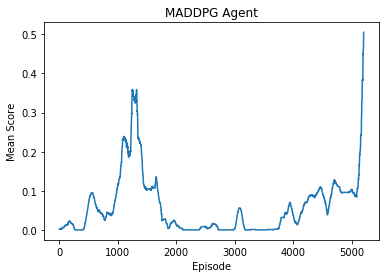

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_mean)+1), scores_mean)
plt.title('MADDPG Agent')
plt.ylabel('Mean Score')
plt.xlabel('Episode')
plt.show()

# Test the trained agents

NOTE: the following codes are saved to the file `test.py`.

In [ ]:
!pip -q install ./python

#load packages
from unityagents import UnityEnvironment
from maddpg import MADDPGAgent
import numpy as np
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

# instantiate env
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=False)[brain_name]

# instantiate agent
agent = MADDPGAgent(state_size=env_info.vector_observations.shape[1], action_size= brain.vector_action_space_size, seed=1)

# Load trained model weights
agent.actor_local.load_state_dict(torch.load('checkpoint_actor1.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic1.pth'))

num_agents = len(env_info.agents)
env_info = env.reset(train_mode=False)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
# initialize the score (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

In [ ]:
env.close()